# <span style="color:#DC143C">Part 2</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier

from sklearn.svm import SVC
from xgboost import XGBClassifier


lakers_purple = '#552583'
lakers_orange = '#FDB927'
SEED = 24

In [2]:
from sklearn import preprocessing, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [3]:
data1 = pd.read_csv("output11.csv")
data = data1.copy()

In [4]:
data.head()

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,opponent,...,2PT Field Goal,3PT Field Goal,Bank Shot,Dunk,Hook Shot,Jump Shot,Layup,Tip Shot,home_court,injury
0,Jump Shot,Jump Shot,-157,0,1,0,2000,15,0.0,POR,...,True,False,False,False,False,True,False,False,0,0
1,Jump Shot,Jump Shot,-101,135,1,0,2000,16,1.0,POR,...,True,False,False,False,False,True,False,False,0,0
2,Jump Shot,Jump Shot,138,175,1,0,2000,22,0.0,POR,...,True,False,False,False,False,True,False,False,0,0
3,Driving Dunk Shot,Dunk,0,0,2,0,2000,0,1.0,POR,...,True,False,False,True,False,False,False,False,0,0
4,Jump Shot,Jump Shot,-145,-11,3,0,2000,14,0.0,POR,...,True,False,False,False,False,True,False,False,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   loc_x               25697 non-null  int64  
 3   loc_y               25697 non-null  int64  
 4   period              25697 non-null  int64  
 5   playoffs            25697 non-null  int64  
 6   season              25697 non-null  int64  
 7   shot_distance       25697 non-null  int64  
 8   shot_made_flag      25697 non-null  float64
 9   opponent            25697 non-null  object 
 10  remaining_time      25697 non-null  int64  
 11  2PT Field Goal      25697 non-null  bool   
 12  3PT Field Goal      25697 non-null  bool   
 13  Bank Shot           25697 non-null  bool   
 14  Dunk                25697 non-null  bool   
 15  Hook Shot           25697 non-null  bool   
 16  Jump

In [6]:
y = data['shot_made_flag']
#X = data.drop('shot_made_flag', axis=1)
X = data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         25697 non-null  object 
 1   combined_shot_type  25697 non-null  object 
 2   loc_x               25697 non-null  int64  
 3   loc_y               25697 non-null  int64  
 4   period              25697 non-null  int64  
 5   playoffs            25697 non-null  int64  
 6   season              25697 non-null  int64  
 7   shot_distance       25697 non-null  int64  
 8   shot_made_flag      25697 non-null  float64
 9   opponent            25697 non-null  object 
 10  remaining_time      25697 non-null  int64  
 11  2PT Field Goal      25697 non-null  bool   
 12  3PT Field Goal      25697 non-null  bool   
 13  Bank Shot           25697 non-null  bool   
 14  Dunk                25697 non-null  bool   
 15  Hook Shot           25697 non-null  bool   
 16  Jump

# <span style="color:#552583">Training-test-validation split</span>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = SEED, stratify = y)

In [8]:
print("Trening set (shape): ",X_train.shape)
print("Test set (shape): ",X_test.shape)

Trening set (shape):  (21842, 21)
Test set (shape):  (3855, 21)


In [9]:
print(type(X_train), type(X_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


# <span style="color:#552583">Stratification: visualized</span>

In [10]:
######TODO: CHECK THIS GRAPH

12097 9745 2135 1720


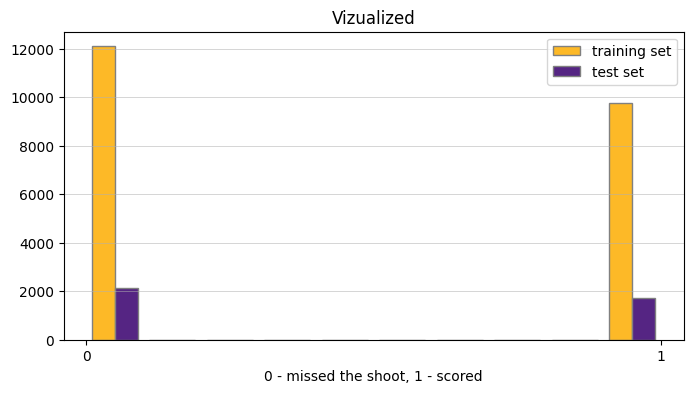

In [14]:
misses_train = np.sum(y_train==0)
scores_train = np.sum(y_train==1)
misses_test = np.sum(y_test==0)
scores_test = np.sum(y_test==1)
print(misses_train, scores_train, misses_test, scores_test)
plt.figure(figsize = (8,4))

plt.title('Vizualized')
plt.xticks([0,1])
plt.xlabel('0 - missed the shoot, 1 - scored')
plt.hist([y_train, y_test], color=[lakers_orange, lakers_purple], label=['training set', 'test set'], edgecolor='gray')
plt.legend(loc='best')
plt.grid(axis = 'y', linewidth = 0.37)

plt.show()

# <span style="color:#552583">Transform to numerical values</span>

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21842 entries, 5140 to 16772
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   action_type         21842 non-null  object 
 1   combined_shot_type  21842 non-null  object 
 2   loc_x               21842 non-null  int64  
 3   loc_y               21842 non-null  int64  
 4   period              21842 non-null  int64  
 5   playoffs            21842 non-null  int64  
 6   season              21842 non-null  int64  
 7   shot_distance       21842 non-null  int64  
 8   shot_made_flag      21842 non-null  float64
 9   opponent            21842 non-null  object 
 10  remaining_time      21842 non-null  int64  
 11  2PT Field Goal      21842 non-null  bool   
 12  3PT Field Goal      21842 non-null  bool   
 13  Bank Shot           21842 non-null  bool   
 14  Dunk                21842 non-null  bool   
 15  Hook Shot           21842 non-null  bool   
 16  Jump S

# <span style="color:#552583">action_type : shot_made : visualised</span>

In [16]:
len(X_train.action_type.unique())

53

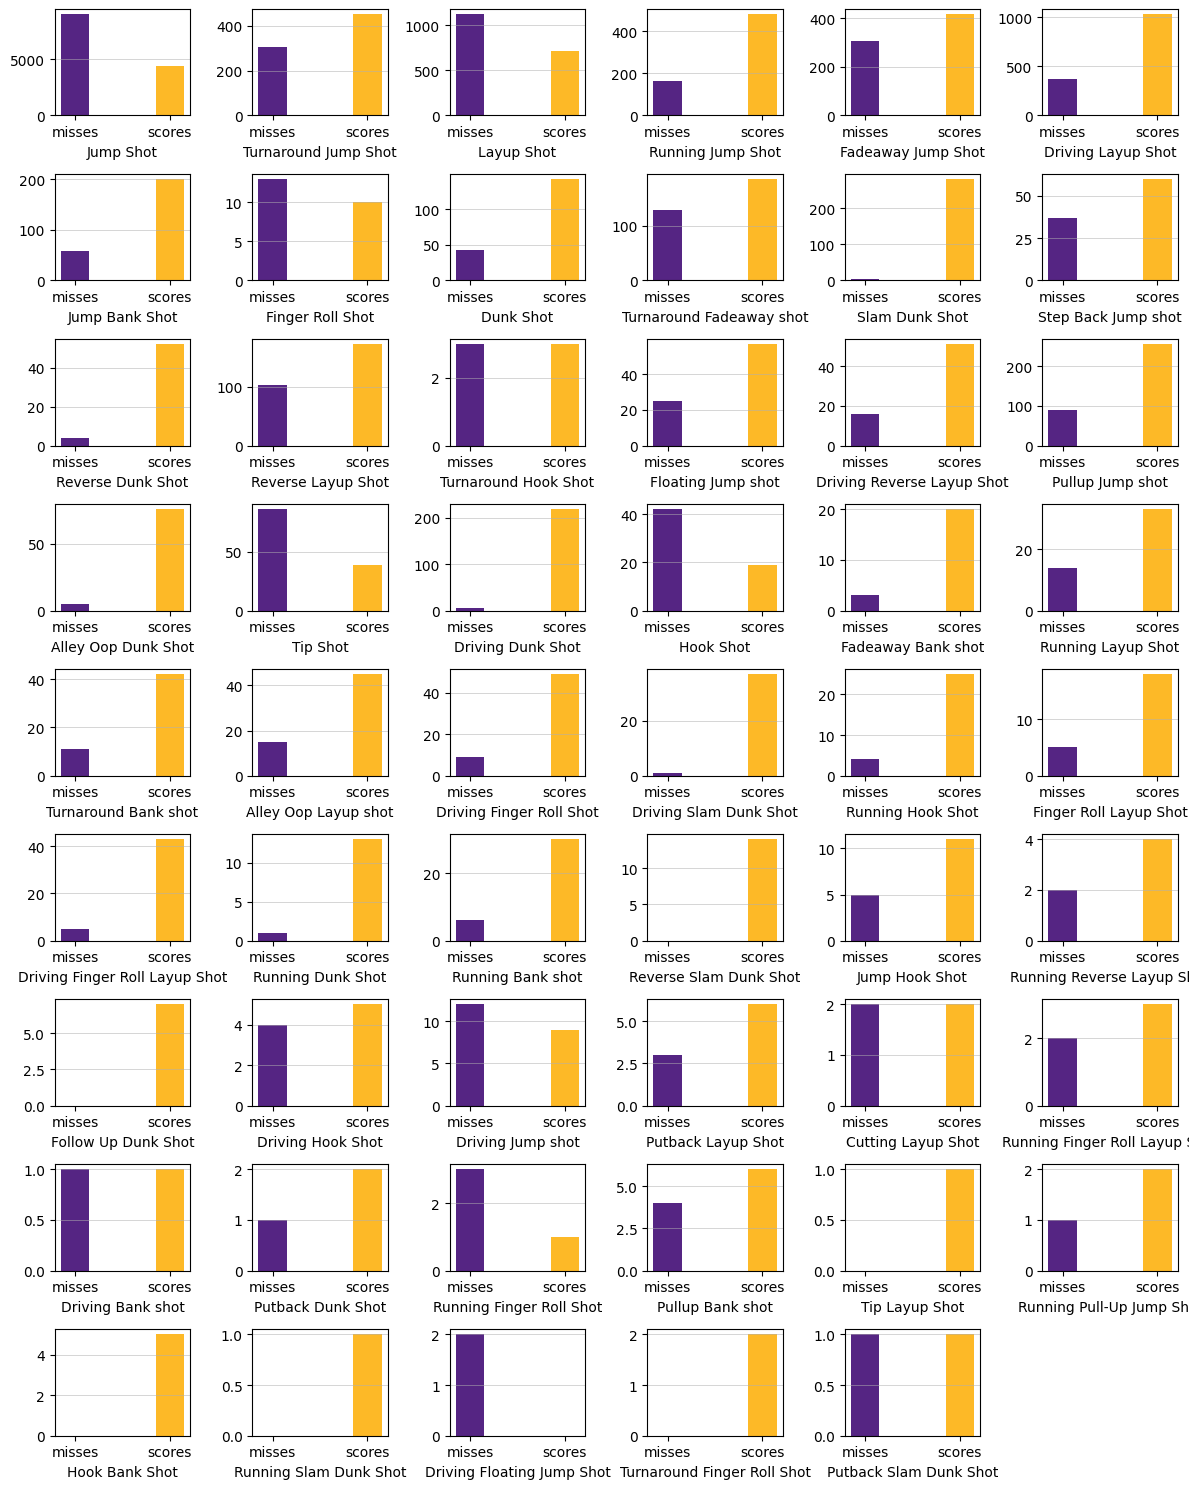

In [17]:
action_type_unique = X_train.action_type.unique()
rows = 9
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(12,15))
axes = axes.flatten()
i=0
for x in action_type_unique:
    curr_scored = np.sum(X_train[X_train['action_type'] == x].shot_made_flag == 1) 
    curr_missed = np.sum(X_train[X_train['action_type'] == x].shot_made_flag == 0)
    axes[i].set_xticks([0,1])
    axes[i].set_xlabel(x)
    axes[i].bar(['misses', 'scores'], [curr_missed, curr_scored], color = [lakers_purple, lakers_orange], width = 0.3, align = 'center')
    axes[i].grid(axis = 'y', linewidth = 0.37)
    i += 1

fig.delaxes(axes[53])

plt.tight_layout()
plt.show()


In [18]:
#We will replace action_type with probability of scoring on train set

In [20]:
action_types_train = X_train.action_type.unique() 

In [18]:
len(action_types_train)

53

In [21]:
dict = {}
dict_scores = {}
dict_misses = {}
for item in action_types_train:
    #print(item)
    dict[item] = sum(X_train['action_type'] == item)
    dict_scores[item] = X_train.loc[X_train['action_type'] == item, 'shot_made_flag'].sum()
    dict_misses[item] = X_train.loc[(X_train['action_type'] == item) & (X_train['shot_made_flag'] == 0), 'shot_made_flag'].count()
 

print(dict)
print()
print(dict_scores)
print()
print(dict_misses)

{'Jump Shot': 13438, 'Turnaround Jump Shot': 755, 'Layup Shot': 1834, 'Running Jump Shot': 648, 'Fadeaway Jump Shot': 725, 'Driving Layup Shot': 1405, 'Jump Bank Shot': 259, 'Finger Roll Shot': 23, 'Dunk Shot': 184, 'Turnaround Fadeaway shot': 314, 'Slam Dunk Shot': 286, 'Step Back Jump shot': 97, 'Reverse Dunk Shot': 56, 'Reverse Layup Shot': 274, 'Turnaround Hook Shot': 6, 'Floating Jump shot': 82, 'Driving Reverse Layup Shot': 67, 'Pullup Jump shot': 344, 'Alley Oop Dunk Shot': 81, 'Tip Shot': 125, 'Driving Dunk Shot': 223, 'Hook Shot': 61, 'Fadeaway Bank shot': 23, 'Running Layup Shot': 47, 'Turnaround Bank shot': 53, 'Alley Oop Layup shot': 60, 'Driving Finger Roll Shot': 58, 'Driving Slam Dunk Shot': 38, 'Running Hook Shot': 29, 'Finger Roll Layup Shot': 23, 'Driving Finger Roll Layup Shot': 48, 'Running Dunk Shot': 14, 'Running Bank shot': 36, 'Reverse Slam Dunk Shot': 14, 'Jump Hook Shot': 16, 'Running Reverse Layup Shot': 6, 'Follow Up Dunk Shot': 7, 'Driving Hook Shot': 9, 'D

In [23]:
tmp = X_train['action_type'].apply(lambda x: dict_scores[x] / dict[x] if dict[x] != 0 else float('0.5'))
tmp
print(tmp.max())
print(tmp.min())
print(tmp.info())
#X_train['action_type_probability'] = 

1.0
0.0
<class 'pandas.core.series.Series'>
Index: 21842 entries, 5140 to 16772
Series name: action_type
Non-Null Count  Dtype  
--------------  -----  
21842 non-null  float64
dtypes: float64(1)
memory usage: 341.3 KB
None


In [24]:
X_train['action_type_probability'] = tmp

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21842 entries, 5140 to 16772
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   action_type              21842 non-null  object 
 1   combined_shot_type       21842 non-null  object 
 2   loc_x                    21842 non-null  int64  
 3   loc_y                    21842 non-null  int64  
 4   period                   21842 non-null  int64  
 5   playoffs                 21842 non-null  int64  
 6   season                   21842 non-null  int64  
 7   shot_distance            21842 non-null  int64  
 8   shot_made_flag           21842 non-null  float64
 9   opponent                 21842 non-null  object 
 10  remaining_time           21842 non-null  int64  
 11  2PT Field Goal           21842 non-null  bool   
 12  3PT Field Goal           21842 non-null  bool   
 13  Bank Shot                21842 non-null  bool   
 14  Dunk                    

In [26]:
tmp2 = X_test['action_type'].apply(lambda x: dict_scores[x] / dict[x] if x in dict else float('0.5'))

In [27]:
X_test['action_type_probability'] = tmp2

In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3855 entries, 8130 to 10716
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   action_type              3855 non-null   object 
 1   combined_shot_type       3855 non-null   object 
 2   loc_x                    3855 non-null   int64  
 3   loc_y                    3855 non-null   int64  
 4   period                   3855 non-null   int64  
 5   playoffs                 3855 non-null   int64  
 6   season                   3855 non-null   int64  
 7   shot_distance            3855 non-null   int64  
 8   shot_made_flag           3855 non-null   float64
 9   opponent                 3855 non-null   object 
 10  remaining_time           3855 non-null   int64  
 11  2PT Field Goal           3855 non-null   bool   
 12  3PT Field Goal           3855 non-null   bool   
 13  Bank Shot                3855 non-null   bool   
 14  Dunk                     

# <span style="color:#552583">combined_shot_type : shot_made : visualised</span>

In [29]:
len(X_train.combined_shot_type.unique())

6

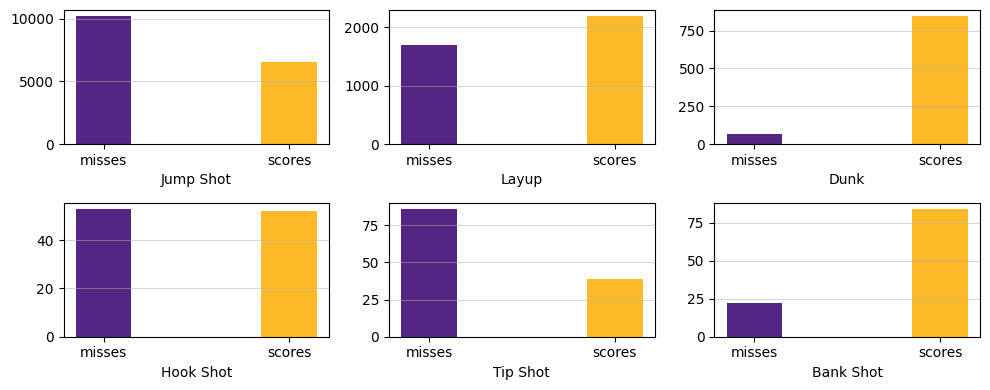

In [30]:
cs_type_unique = X_train.combined_shot_type.unique()
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10,4))
axes = axes.flatten()
i = 0
for x in cs_type_unique:
    curr_scored = np.sum(X_train[X_train['combined_shot_type'] == x].shot_made_flag == 1) 
    curr_missed = np.sum(X_train[X_train['combined_shot_type'] == x].shot_made_flag == 0)
    axes[i].set_xticks([0,1])
    axes[i].set_xlabel(x)
    axes[i].bar(['misses', 'scores'], [curr_missed, curr_scored], color = [lakers_purple, lakers_orange], width = 0.3, align = 'center')
    axes[i].grid(axis = 'y', linewidth = 0.37)
    i += 1

plt.tight_layout()
plt.show()

In [31]:
combined_types_train = X_train.combined_shot_type.unique()

In [32]:
dict.clear()
dict_scores.clear()
dict_misses.clear()

dict = {}
dict_scores = {}
dict_misses = {}
for item in combined_types_train:
    #print(item)
    dict[item] = sum(X_train['combined_shot_type'] == item)
    dict_scores[item] = X_train.loc[X_train['combined_shot_type'] == item, 'shot_made_flag'].sum()
    dict_misses[item] = X_train.loc[(X_train['combined_shot_type'] == item) & (X_train['shot_made_flag'] == 0), 'shot_made_flag'].count()
 

print(dict)
print()
print(dict_scores)
print()
print(dict_misses)

{'Jump Shot': 16727, 'Layup': 3870, 'Dunk': 909, 'Hook Shot': 105, 'Tip Shot': 125, 'Bank Shot': 106}

{'Jump Shot': 6543.0, 'Layup': 2183.0, 'Dunk': 844.0, 'Hook Shot': 52.0, 'Tip Shot': 39.0, 'Bank Shot': 84.0}

{'Jump Shot': 10184, 'Layup': 1687, 'Dunk': 65, 'Hook Shot': 53, 'Tip Shot': 86, 'Bank Shot': 22}


In [33]:
tmp = X_train['combined_shot_type'].apply(lambda x: dict_scores[x] / dict[x] if dict[x] != 0 else float('0.5'))
tmp
print(tmp.max())
print(tmp.min())
print(tmp.info())

0.9284928492849285
0.312
<class 'pandas.core.series.Series'>
Index: 21842 entries, 5140 to 16772
Series name: combined_shot_type
Non-Null Count  Dtype  
--------------  -----  
21842 non-null  float64
dtypes: float64(1)
memory usage: 341.3 KB
None


In [34]:
X_train['combined_type_probability'] = tmp
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21842 entries, 5140 to 16772
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                21842 non-null  object 
 1   combined_shot_type         21842 non-null  object 
 2   loc_x                      21842 non-null  int64  
 3   loc_y                      21842 non-null  int64  
 4   period                     21842 non-null  int64  
 5   playoffs                   21842 non-null  int64  
 6   season                     21842 non-null  int64  
 7   shot_distance              21842 non-null  int64  
 8   shot_made_flag             21842 non-null  float64
 9   opponent                   21842 non-null  object 
 10  remaining_time             21842 non-null  int64  
 11  2PT Field Goal             21842 non-null  bool   
 12  3PT Field Goal             21842 non-null  bool   
 13  Bank Shot                  21842 non-null  bool 

In [35]:
tmp2 = X_test['combined_shot_type'].apply(lambda x: dict_scores[x] / dict[x] if x in dict else float('0.5'))
X_test['combined_type_probability'] = tmp2
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3855 entries, 8130 to 10716
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                3855 non-null   object 
 1   combined_shot_type         3855 non-null   object 
 2   loc_x                      3855 non-null   int64  
 3   loc_y                      3855 non-null   int64  
 4   period                     3855 non-null   int64  
 5   playoffs                   3855 non-null   int64  
 6   season                     3855 non-null   int64  
 7   shot_distance              3855 non-null   int64  
 8   shot_made_flag             3855 non-null   float64
 9   opponent                   3855 non-null   object 
 10  remaining_time             3855 non-null   int64  
 11  2PT Field Goal             3855 non-null   bool   
 12  3PT Field Goal             3855 non-null   bool   
 13  Bank Shot                  3855 non-null   bool  

# <span style="color:#552583">opponent : shot_made : visualised</span>

In [36]:
len(X_train.opponent.unique())

33

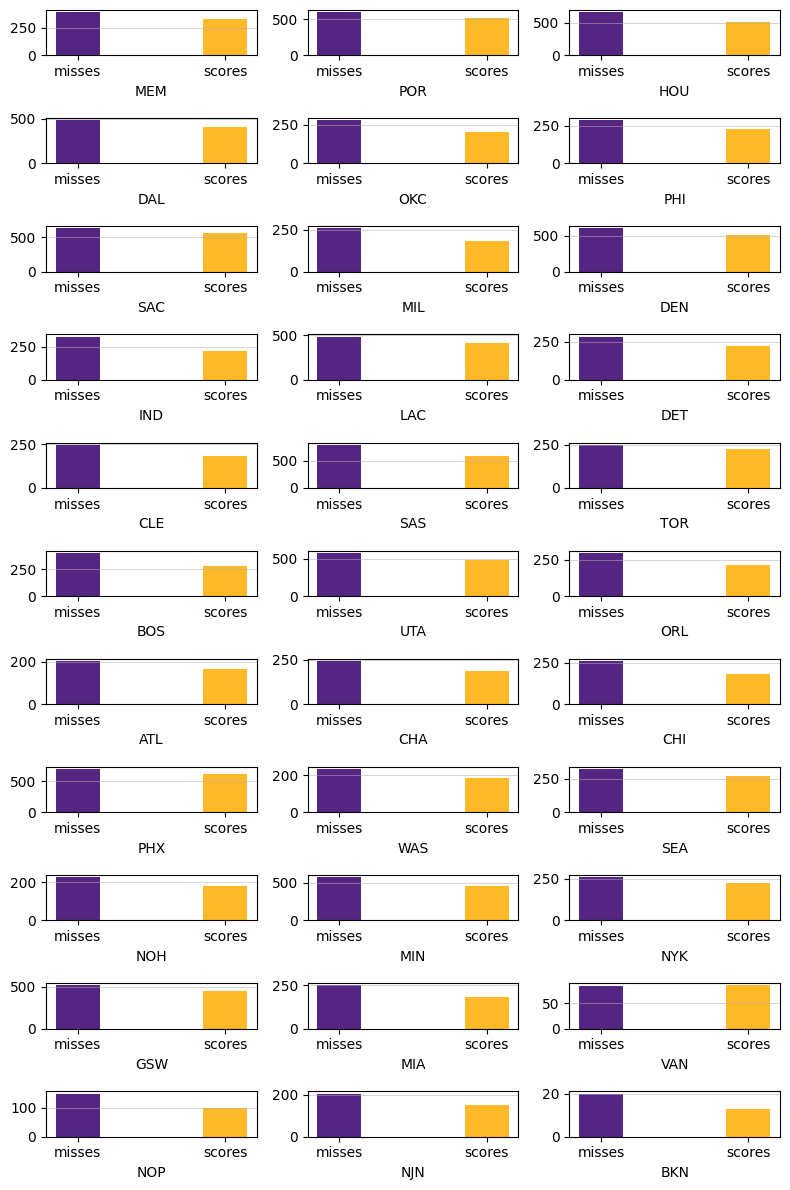

In [37]:
opponent_unique = X_train.opponent.unique()
rows = 11
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(8,12))
axes = axes.flatten()
i=0
for x in opponent_unique:
    curr_scored = np.sum(X_train[X_train['opponent'] == x].shot_made_flag == 1) 
    curr_missed = np.sum(X_train[X_train['opponent'] == x].shot_made_flag == 0)
    #print(x, curr_scored, curr_missed)
    axes[i].set_xticks([0,1])
    axes[i].set_xlabel(x)

    axes[i].bar(['misses', 'scores'], [curr_missed, curr_scored], color = [lakers_purple, lakers_orange], width = 0.3, align = 'center')
    

    axes[i].grid(axis = 'y', linewidth = 0.37)
    i += 1


plt.tight_layout()
plt.show()


In [38]:
opponents_train = X_train.opponent.unique()

In [39]:
dict.clear()
dict_scores.clear()
dict_misses.clear()

dict = {}
dict_scores = {}
dict_misses = {}
for item in opponents_train:
    #print(item)
    dict[item] = sum(X_train['opponent'] == item)
    dict_scores[item] = X_train.loc[X_train['opponent'] == item, 'shot_made_flag'].sum()
    dict_misses[item] = X_train.loc[(X_train['opponent'] == item) & (X_train['shot_made_flag'] == 0), 'shot_made_flag'].count()
 

print(dict)
print(len(dict))
print(dict_scores)
print(len(dict_scores))
print(dict_misses)
print(len(dict_misses))

{'MEM': 728, 'POR': 1113, 'HOU': 1179, 'DAL': 891, 'OKC': 483, 'PHI': 515, 'SAC': 1184, 'MIL': 442, 'DEN': 1115, 'IND': 548, 'LAC': 905, 'DET': 504, 'CLE': 428, 'SAS': 1387, 'TOR': 475, 'BOS': 683, 'UTA': 1066, 'ORL': 508, 'ATL': 367, 'CHA': 429, 'CHI': 441, 'PHX': 1314, 'WAS': 418, 'SEA': 590, 'NOH': 404, 'MIN': 1029, 'NYK': 486, 'GSW': 966, 'MIA': 435, 'VAN': 171, 'NOP': 247, 'NJN': 358, 'BKN': 33}
33
{'MEM': 335.0, 'POR': 515.0, 'HOU': 517.0, 'DAL': 408.0, 'OKC': 203.0, 'PHI': 229.0, 'SAC': 558.0, 'MIL': 183.0, 'DEN': 512.0, 'IND': 221.0, 'LAC': 418.0, 'DET': 221.0, 'CLE': 182.0, 'SAS': 592.0, 'TOR': 226.0, 'BOS': 280.0, 'UTA': 483.0, 'ORL': 212.0, 'ATL': 164.0, 'CHA': 186.0, 'CHI': 181.0, 'PHX': 619.0, 'WAS': 186.0, 'SEA': 270.0, 'NOH': 178.0, 'MIN': 453.0, 'NYK': 227.0, 'GSW': 452.0, 'MIA': 185.0, 'VAN': 86.0, 'NOP': 99.0, 'NJN': 151.0, 'BKN': 13.0}
33
{'MEM': 393, 'POR': 598, 'HOU': 662, 'DAL': 483, 'OKC': 280, 'PHI': 286, 'SAC': 626, 'MIL': 259, 'DEN': 603, 'IND': 327, 'LAC': 48

In [40]:
tmp = X_train['opponent'].apply(lambda x: dict_scores[x] / dict[x] if x in dict else float('0.5'))
X_train['opponent_probability'] = tmp
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21842 entries, 5140 to 16772
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                21842 non-null  object 
 1   combined_shot_type         21842 non-null  object 
 2   loc_x                      21842 non-null  int64  
 3   loc_y                      21842 non-null  int64  
 4   period                     21842 non-null  int64  
 5   playoffs                   21842 non-null  int64  
 6   season                     21842 non-null  int64  
 7   shot_distance              21842 non-null  int64  
 8   shot_made_flag             21842 non-null  float64
 9   opponent                   21842 non-null  object 
 10  remaining_time             21842 non-null  int64  
 11  2PT Field Goal             21842 non-null  bool   
 12  3PT Field Goal             21842 non-null  bool   
 13  Bank Shot                  21842 non-null  bool 

In [41]:
tmp3 = X_test['opponent'].apply(lambda x: dict_scores[x] / dict[x] if x in dict else float('0.5'))

In [42]:
X_test['opponent_probability'] = tmp3

In [43]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3855 entries, 8130 to 10716
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                3855 non-null   object 
 1   combined_shot_type         3855 non-null   object 
 2   loc_x                      3855 non-null   int64  
 3   loc_y                      3855 non-null   int64  
 4   period                     3855 non-null   int64  
 5   playoffs                   3855 non-null   int64  
 6   season                     3855 non-null   int64  
 7   shot_distance              3855 non-null   int64  
 8   shot_made_flag             3855 non-null   float64
 9   opponent                   3855 non-null   object 
 10  remaining_time             3855 non-null   int64  
 11  2PT Field Goal             3855 non-null   bool   
 12  3PT Field Goal             3855 non-null   bool   
 13  Bank Shot                  3855 non-null   bool  

# <span style="color:#552583">Dropping columns</span>

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21842 entries, 5140 to 16772
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                21842 non-null  object 
 1   combined_shot_type         21842 non-null  object 
 2   loc_x                      21842 non-null  int64  
 3   loc_y                      21842 non-null  int64  
 4   period                     21842 non-null  int64  
 5   playoffs                   21842 non-null  int64  
 6   season                     21842 non-null  int64  
 7   shot_distance              21842 non-null  int64  
 8   shot_made_flag             21842 non-null  float64
 9   opponent                   21842 non-null  object 
 10  remaining_time             21842 non-null  int64  
 11  2PT Field Goal             21842 non-null  bool   
 12  3PT Field Goal             21842 non-null  bool   
 13  Bank Shot                  21842 non-null  bool 

In [45]:
y_train = X_train['shot_made_flag']
y_test = X_test['shot_made_flag']
X_train.drop(columns = ['action_type', 'combined_shot_type', 'opponent','shot_made_flag'], inplace=True)
X_test.drop(columns = ['action_type', 'combined_shot_type', 'opponent','shot_made_flag'], inplace=True)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21842 entries, 5140 to 16772
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loc_x                      21842 non-null  int64  
 1   loc_y                      21842 non-null  int64  
 2   period                     21842 non-null  int64  
 3   playoffs                   21842 non-null  int64  
 4   season                     21842 non-null  int64  
 5   shot_distance              21842 non-null  int64  
 6   remaining_time             21842 non-null  int64  
 7   2PT Field Goal             21842 non-null  bool   
 8   3PT Field Goal             21842 non-null  bool   
 9   Bank Shot                  21842 non-null  bool   
 10  Dunk                       21842 non-null  bool   
 11  Hook Shot                  21842 non-null  bool   
 12  Jump Shot                  21842 non-null  bool   
 13  Layup                      21842 non-null  bool 

In [47]:
feature_names = X_train.columns.tolist()

# <span style="color:#552583">Standardization</span>

In [48]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
print(X_test)

[[ 0.21505787  0.51975451  0.41650009 ... -0.63669647 -0.4466744
  -2.12955201]
 [ 1.15945475  2.31754501 -1.32309163 ... -0.63669647 -0.4466744
  -1.21478183]
 [ 1.50452285  0.58802504  0.41650009 ... -0.63669647 -0.4466744
  -0.90810961]
 ...
 [ 0.16057343  0.80421504  0.41650009 ... -0.63669647 -0.4466744
  -0.27825818]
 [-0.39335167 -0.26535653  0.41650009 ... -0.63669647 -0.4466744
   2.66564391]
 [ 0.61461039 -0.58395231  1.28629594 ... -0.63669647 -0.4466744
  -0.26131423]]


# <span style="color:#552583">Saving scaler</span>

In [50]:
#TODO

# <span style="color:#552583">1. Logistic regression</span>

In [51]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred_log = log_reg.predict(X_test)
log_acc = accuracy_score(y_pred_log, y_test)
print('Accuracy on test set: {0:.2f}%'.format(log_acc*100))

Accuracy on test set: 67.99%


In [52]:
log_reg.intercept_

array([-0.18279376])

In [53]:
log_reg.coef_

array([[ 0.03852751,  0.04967931, -0.05990183, -0.01208001, -0.0132194 ,
         0.05025809,  0.05871616,  0.02654094, -0.02654094, -0.00896281,
         0.09193791, -0.00106097, -0.0230826 , -0.02198633,  0.00669649,
         0.02667395, -0.08725485,  0.82808551,  0.0659254 ,  0.05945788]])

['loc_x', 'loc_y', 'period', 'playoffs', 'season', 'shot_distance', 'remaining_time', '2PT Field Goal', '3PT Field Goal', 'Bank Shot', 'Dunk', 'Hook Shot', 'Jump Shot', 'Layup', 'Tip Shot', 'home_court', 'injury', 'action_type_probability', 'combined_type_probability', 'opponent_probability']


<Figure size 1000x600 with 0 Axes>

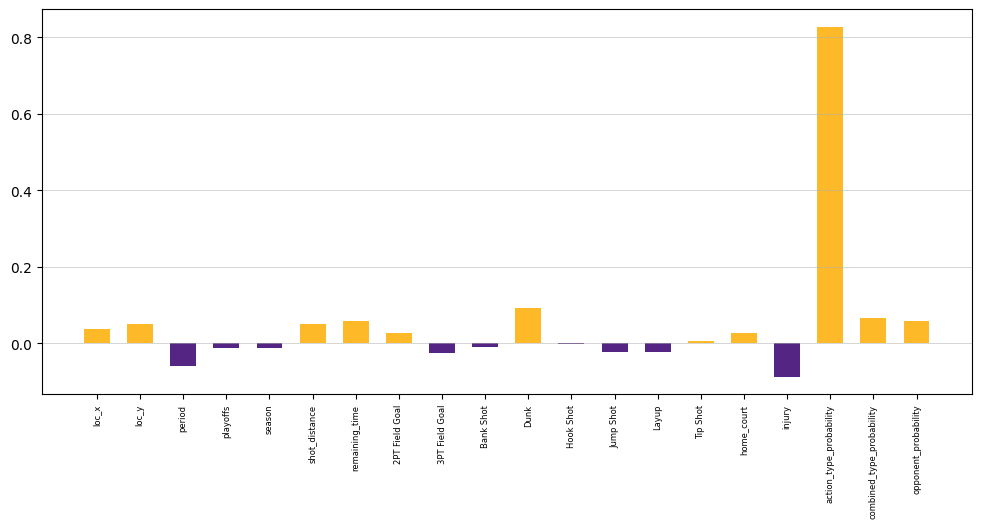

In [54]:
print(feature_names)
plt.figure(figsize = (10,6))
N = len(feature_names)
values = log_reg.coef_[0]
plt.figure(figsize=(12, 5))
plt.bar(np.arange(0, N), values, color=[lakers_orange if v >= 0 else lakers_purple for v in values], width = 0.6)
plt.xticks(np.arange(0, N), feature_names, rotation='vertical', fontsize = 6)
plt.grid(axis='y', linewidth = 0.37)

plt.show()

In [52]:
y_pred_train_log = log_reg.predict(X_train)
log_train_acc = accuracy_score(y_pred_train_log, y_train)
print('Acc on training set: {0:.2f}%'.format(log_train_acc*100))

Acc on training set: 68.20%


In [54]:
param_grid = {
    'C': [0.0001, 0.001, 0.01],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']
}

# Create Logistic Regression model
lr = LogisticRegression()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score: ", best_score)


Best parameters found:  {'C': 0.001, 'solver': 'liblinear'}
Best cross-validation score:  0.6821718660526168


In [55]:
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the performance
log_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Test Accuracy: 0.6807


solver       C     lbfgs  liblinear  newton-cg       sag
0       0.0001  0.646461   0.659189   0.646369  0.646553
1       0.0010  0.682080   0.682172   0.682126  0.682035
2       0.0100  0.682035   0.682126   0.682035  0.682035


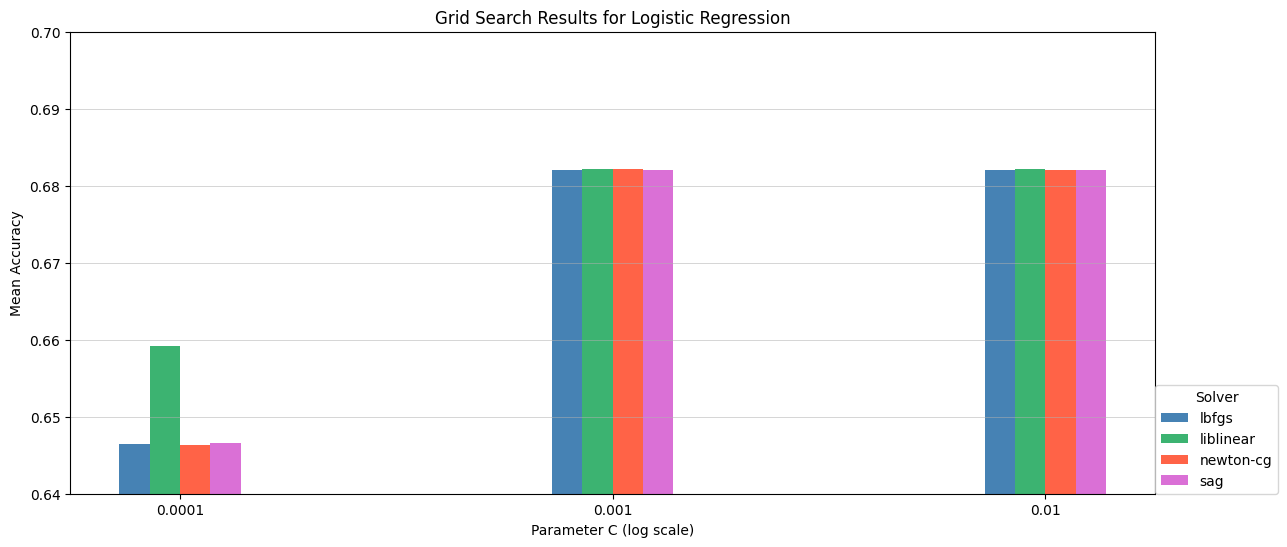

In [56]:
results = grid_search.cv_results_

# Extract the mean test scores and parameters
mean_scores = results['mean_test_score']
params = results['params']

#print(params)

# Convert parameters to a format suitable for plotting
C_values = [p['C'] for p in params]
solvers = [p['solver'] for p in params]

# Create a DataFrame for easier plotting
df = pd.DataFrame({'C': C_values, 'solver': solvers, 'mean_score': mean_scores})

# Prepare data for bar plot
pivot_table = df.pivot(index='C', columns='solver', values='mean_score').fillna(0)
pivot_table = pivot_table.reset_index()

print(pivot_table)

# Plot the results
plt.figure(figsize=(14, 6))
bar_width = 0.07  # Width of each bar
C_values_sorted = sorted(df['C'].unique())
bar_positions = np.arange(len(C_values_sorted))

colors = ['#4682B4',  # Steel Blue
          '#3CB371',  # Medium Sea Green
          '#FF6347',  # Tomato (a bright red)
          '#DA70D6']  # Orchid (a soft purple)
for i, solver in enumerate(pivot_table.columns[1:]):  # Skip the first column which is 'C'
    plt.bar(
        bar_positions + i * bar_width,
        pivot_table[solver],
        width=bar_width,
        label=solver,
        color=colors[i]
    )

# Customize x-axis with parameter C values
plt.xticks(bar_positions + (len(pivot_table.columns[1:]) - 1) * bar_width / 2, C_values_sorted)

plt.xlabel('Parameter C (log scale)')
plt.ylabel('Mean Accuracy')
plt.title('Grid Search Results for Logistic Regression')
plt.legend(title='Solver', loc = (1,0))
plt.grid(axis = 'y', linewidth = 0.37)
plt.ylim(0.64, 0.7)
plt.show()

# <span style="color:#552583">2. KNN</span>

In [57]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [5, 6, 7, 8, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Predict on the test data using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the performance
knn_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
#print("Classification Report:")
#print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}
Best Cross-Validation Score: 0.6482
Test Accuracy: 0.6516
Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.83      0.72      2135
         1.0       0.67      0.43      0.53      1720

    accuracy                           0.65      3855
   macro avg       0.66      0.63      0.63      3855
weighted avg       0.66      0.65      0.64      3855



In [58]:
results = grid_search.cv_results_

# Filter results for metric='euclidean' and weights='uniform'
euclidean_uniform_mask = (
    (results['param_metric'] == 'euclidean') &
    (results['param_weights'] == 'uniform')
)

# Get the indices that match this condition
matching_indices = np.where(euclidean_uniform_mask)[0]

# Save all accuracy scores on the test set for the matching conditions
test_accuracies = []

for idx in matching_indices:
    # Find the specific model
    model = grid_search.cv_results_['params'][idx]
    model_n_neighbors = model['n_neighbors']
    
    # Make predictions on the test set using this model
    knn_model = KNeighborsClassifier(
        n_neighbors=model_n_neighbors,
        weights='uniform',
        metric='euclidean'
    )
    
    # Fit the model with the training data
    knn_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = knn_model.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    test_accuracies.append((model_n_neighbors, accuracy))

# Print or save the accuracy scores
for n_neighbors, accuracy in test_accuracies:
    print(f"n_neighbors: {n_neighbors}, Test Accuracy: {accuracy:.4f}")

# Optionally, save the results to a file
with open('knn_euclidean_uniform_accuracies.txt', 'w') as file:
    for n_neighbors, accuracy in test_accuracies:
        file.write(f"n_neighbors: {n_neighbors}, Test Accuracy: {accuracy:.4f}\n")

n_neighbors: 5, Test Accuracy: 0.6319
n_neighbors: 6, Test Accuracy: 0.6470
n_neighbors: 7, Test Accuracy: 0.6446
n_neighbors: 8, Test Accuracy: 0.6519
n_neighbors: 9, Test Accuracy: 0.6459


### Vizuelizacija odnosa preciznosti predikcije i vrednosti koeficijenta k

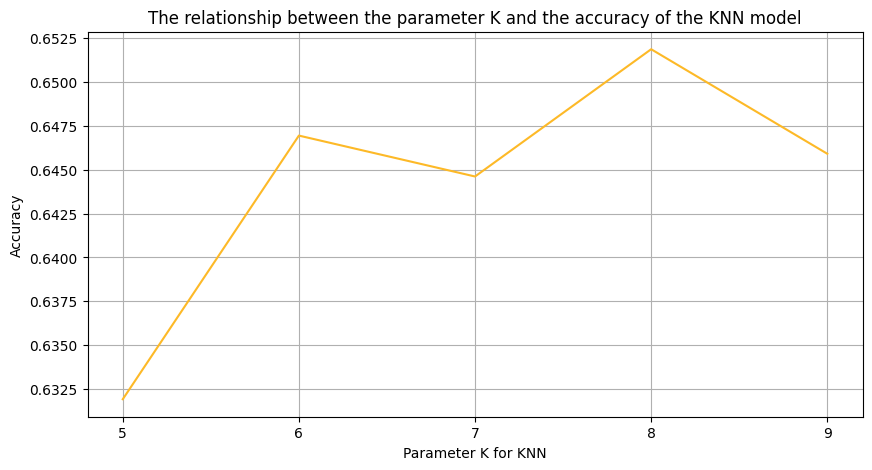

In [93]:
plt.figure(figsize = (10,5))

plt.title("The relationship between the parameter K and the accuracy of the KNN model")

plt.xticks([x[0] for x in test_accuracies])
plt.xlabel('Parameter K for KNN')
plt.ylabel('Accuracy')
plt.grid()
plt.plot([x[0] for x in test_accuracies], [x[1] for x in test_accuracies],color=lakers_orange)
plt.show()

In [62]:
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_pred_knn,y_test)
print('Tačnost: {0:.2f}%'.format(knn_acc*100))

Tačnost: 65.19%


# <span style="color:#552583"> 3. Decision trees</span>

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 7, 8, 9],
    'max_features': [0.9]  # keeping it constant as in your loop
}

# Initialize the DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=7)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Make predictions using the best estimator
y_pred_dtc = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy on the test set
dtc_acc = accuracy_score(y_test, y_pred_dtc)

# Print the best parameters and accuracy
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Test Set Accuracy: {dtc_acc:.4f}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 0.9}
Best Cross-Validation Score: 0.6795
Test Set Accuracy: 0.6812


In [64]:
dtc

DecisionTreeClassifier(random_state=7)

In [65]:
print('Tačnost: {0:.2f}%'.format(dtc_acc*100))

Tačnost: 68.12%


In [92]:
#TODO: visualize this

# <span style="color:#552583">4. Random forests</span>

In [66]:
#rf = RandomForestClassifier(n_estimators = 20, max_depth = 3, random_state = 7)
#rf.fit(X_train, y_train)

In [67]:
rf = RandomForestClassifier(random_state = SEED)
param_grid = {
    'n_estimators': [20, 50, 70],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=24), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [20, 50, 70]},
             scoring='accuracy', verbose=2)

In [68]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
y_pred_dtc = grid_search.best_estimator_.predict(X_test)
print("Best Accuracy Score:", best_score)

# Step 7: Use the best estimator for predictions or further evaluation
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Best Accuracy Score: 0.6823092601302718


In [69]:
y_pred_rf = grid_search.best_estimator_.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# Print the best parameters and accuracy
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")
print(f"Test Set Accuracy: {rf_acc:.4f}")


Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Best Cross-Validation Score: 0.6823
Test Set Accuracy: 0.6812


In [91]:
#TODO: visualize this

# <span style="color:#552583">5. SVC</span>

In [70]:
svc = SVC()

In [71]:
param_grid = {
    'C': [0.1, 1],
    'gamma': [0.01, 0.1],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(svc, param_grid,cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

In [72]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': [0.01, 0.1],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [73]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.6817599039016984


In [74]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", svc_acc)

Test Accuracy: 0.6793774319066148


In [90]:
#TODO: visualize this

# <span style="color:#552583">6. XGBoost</span>

In [75]:
xgb = XGBClassifier(random_state=SEED,use_label_encoder=False, eval_metric='mlogloss')

In [76]:
num = misses_train/scores_train

param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.5, 0.1],
    'max_depth': [4, 5, 6],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [ 0.9, 1.0],
    'scale_pos_weight' : [1, num, 2]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


In [77]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=24, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.9, 1.0],
                         'learning_rate': [0.5, 0.1], 'max_depth': [4, 5, 6],
                         'n_estimators': [100, 150],
                         'scale_pos_weight': [1, 1.2413545407901487, 2],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=1)

In [78]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.9}
Best Score: 0.6824466227676343


In [79]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.6853437094682231


In [89]:
#print("\nClassification Report:")
#print(classification_report(y_test, y_pred))

In [ ]:
#TODO: visualize this

# <span style="color:#552583"> 7. AdaBoost </span>

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [82]:
ada = AdaBoostClassifier(estimator = dtc, random_state = SEED)
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1],
    'estimator__max_depth': [2, 3]
}
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [83]:
grid_search.fit(X_train, y_train)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=7),
                                          random_state=24),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [2, 3],
                         'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [84]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100}
Best Score: 0.6826755919368646


In [85]:
y_pred = grid_search.predict(X_test)
ada_acc = grid_search.score(X_test, y_test)
print("Test Accuracy:", ada_acc)

Test Accuracy: 0.6798962386511025


In [ ]:
#TODO: visualize this

# <span style="color:#552583">Comparing different models</span>

In [86]:
accuracies = [log_acc, knn_acc, dtc_acc, rf_acc, svc_acc, xgb_acc, ada_acc]
labels = ["Logistic regression", "KNN", "Decision trees", "Random forests", "SVC", "XGBoost", "AdaBoost"]


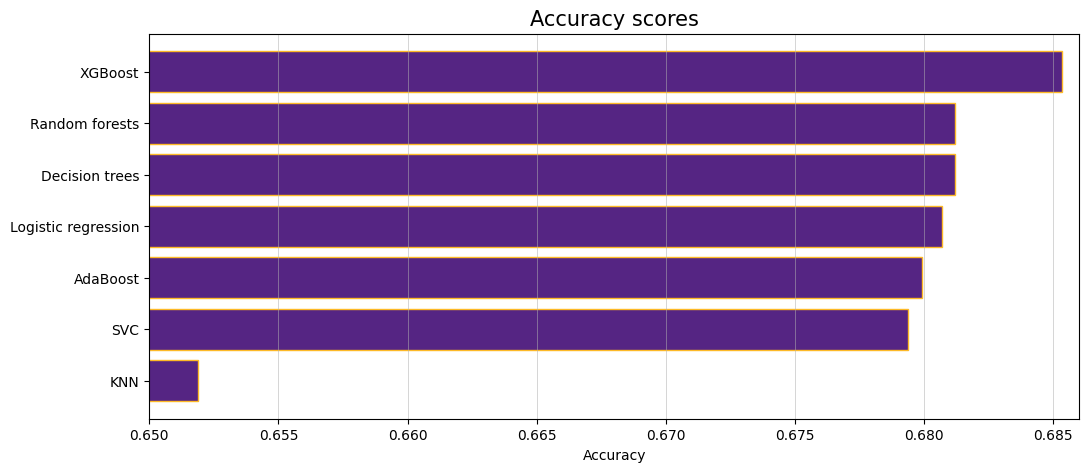

In [87]:
plt.figure(figsize = (12,5))

unsorted_list = [(labels, accuracies) for labels, accuracies in 
                  zip(accuracies, labels)]
sorted_list = sorted(unsorted_list) 

labels_sorted = []
accuracies_sorted = []

for i in sorted_list:
    labels_sorted += [i[1]]
    accuracies_sorted += [i[0]]
    
plt.title("Accuracy scores", fontsize=15)
plt.xlabel("Accuracy", fontsize=10)
plt.grid(axis = 'x', linewidth = 0.37)

plt.barh(labels_sorted, accuracies_sorted, color= lakers_purple, edgecolor=lakers_orange)
plt.xlim(0.65, 0.686)

plt.show()

In [88]:
#TODO: Change metrics to AUC?

In [ ]:
# <span style="color:#552583">Nesto</span>